In [1]:
import os
import warnings
from glob import glob
from scipy import stats
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from adjustText import adjust_text

In [2]:
def label_points(x, y, data, ax, offset=(5, 0), labels=None, adjustlabels=False, fontsize=None):
    """Draw labels on a matplotlib plot (e.g., scatter plot).
    
    :param x: column name
    :param y: column name
    :param data: a DataFrame with labels as Index.
    :param ax: matplotlib Axes object on which to draw labels.
    :param offset: (x, y) tuple in typographic points of label wrt marker.
    :param labels: if given, only draw labels for given sequence of labels.
    """
    if labels is None:
        labels = data.index
    texts = []
    for label, (xval, yval) in data.loc[labels, [x, y]].iterrows():
        if adjustlabels:
            texts.append(ax.text(xval, yval, str(label), horizontalalignment='center', verticalalignment='center', fontsize=fontsize))
        else:
            ax.annotate(str(label), xy=(xval, yval), xytext=offset, textcoords='offset points', fontsize=fontsize)  # horizontalalignment='left')
    if adjustlabels:
        adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'), lim=10000, force_text=(0.1, 0.1))
        

def makeplot(x, y, data, style=None, adjustlabels=False, filename=None, friendlynames=None, addcorr=False, fontsize=None, expandlim=False):
    """Make a scatter plot showing a linear regression with 95% CI.

    :param x: column name
    :param y: column name
    :param data: a DataFrame with labels as Index.
    :param style: a categorical column to base the hue/marker style of the plotted points on
    :param adjustlabels: if True, use adjustText library to avoid overlapping labels.
    :param filename: if not None, save plot as filename.png and filename.png.
    :param friendlynames: if not None, use this dictionary to look up a suitable label for the x and y axes.
    :param addcor: if True, add textbox with Spearman rho and p-value.
    :param expandlim: add 30% more margin on both axes, to give more room form labels
    :returns: a Seaborn FacetGrid instance.
    """
    labels = None    
    fg = sns.relplot(x=x, y=y, data=data, style=style, hue=style, kind='scatter', height=7, aspect=1)
    if expandlim:
        x1, x2 = fg.ax.get_xlim()
        fg.ax.set_xlim(x1 - 0.3 * (x2 - x1), x2)  # add margin on left part of x-axis only
        # fg.ax.margins(0.3)  # adds margin on both sides
    if friendlynames is not None:
        fg.ax.set_xlabel(friendlynames[x])
        fg.ax.set_ylabel(friendlynames[y])
    fg.ax.grid(visible=True, which='both', axis='both', linestyle=':');
    if addcorr:
        at = AnchoredText(
            '$\\rho$=%.3f (p=%.3f)' % stats.spearmanr(data[x], data[y]),
            frameon=True, loc='upper right')
        at.patch.set_boxstyle('square,pad=0.')
        fg.ax.add_artist(at)
    label_points(x=x, y=y, data=data, ax=fg.ax, labels=labels, adjustlabels=adjustlabels, fontsize=fontsize)
    if filename is not None:
        fg.savefig(f'{filename}.png', dpi=300)
        fg.savefig(f'{filename}.pdf')
    return fg

## features scatterplot

In [3]:
factors = pd.read_csv('gutenberg-features-fa.dat.xz', sep='\t', index_col=0)
factors['type'] = [a[0] for a in factors.index]  # first letter is used to pick color and marker
factors

,Dim1,Dim2,type
Features,,,
A01.pastVerbs,0.417884,1.932234,A
A03.presVerbs,-0.883874,-0.208310,A
B04.placeAdverbials,0.423934,2.952143,B
B05.timeAdverbials,0.079512,1.145977,B
C06.1persProns,-0.462215,-0.653375,C
C07.2persProns,-1.188477,-0.435373,C
C08.3persProns,0.147789,0.596400,C
C09.impersProns,-0.912830,0.569100,C
C10.demonstrProns,0.551502,-0.479032,C


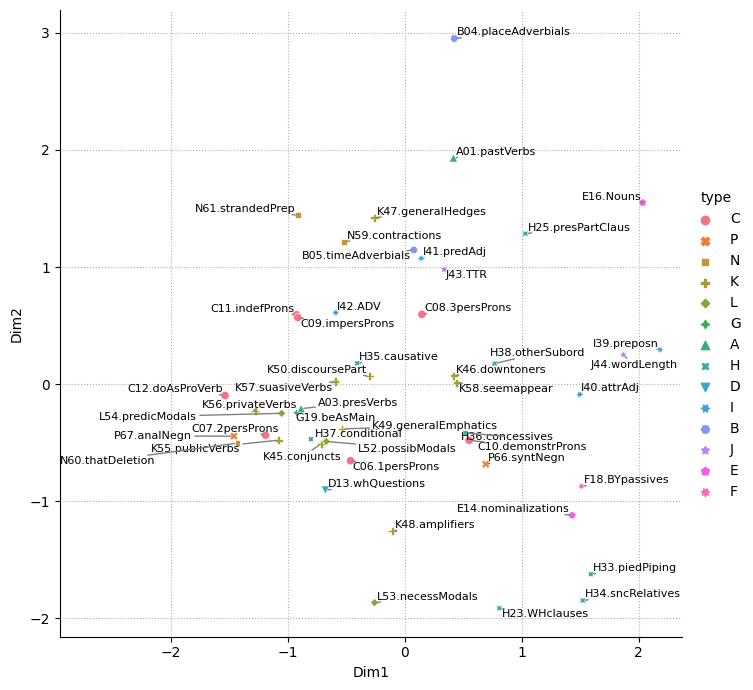

In [4]:
makeplot('Dim1', 'Dim2', factors.sort_values(['Dim1', 'Dim2']), style='type', adjustlabels=True, filename='fig/fig5.9featureMDA', fontsize=8, expandlim=True);

## median of genres scatterplot

In [5]:
# Load extracted factors, select subset of texts that we work with
md = pd.read_csv('metadata-pg-genres-subset.tsv', sep='\t', index_col='id')
df = pd.read_csv('gutenberg-genres-fa.dat.xz', sep='\t')
split = df['ID-Genre'].str.split('-', n=1)
df = df.set_index(split.str[0]).drop(columns=['ID-Genre'])
both = df.index.intersection(md.index)
md = md.loc[both, :]
df = df.loc[both, :]
df = pd.concat([md, df], axis=1)
# df['Genre'] = split.str[1]
# df = df.drop(columns=['ID-Genre'])
df

,title,author,gender,year-birth,year-death,year-worldcat,year-ref,language,translation,downloads,...,Humour,Sea,Pulp fiction,SciFi & Fantasy,General fiction,Mystery & Detective stories,Juvenile,Translations,Dim1,Dim2
PG9993,Captivating Mary Carstairs,"Harrison, Henry Sydnor",NaN,1880.0,1930.0,2001.0,1915,['en'],NaN,5,...,0,0,0,0,1,0,0,0,-0.942158,0.540452
PG9990,"Brave and Bold; Or, The Fortunes of Robert Rus...","Alger, Horatio, Jr.",NaN,1832.0,1899.0,1904.0,1876,['en'],NaN,32,...,0,0,0,0,0,0,1,0,-2.417959,-2.120047
PG9988,Amarilly of Clothes-line Alley,"Maniates, Belle Kanaris",NaN,NaN,NaN,1915.0,1915,['en'],NaN,13,...,0,0,0,0,1,0,0,0,-1.586090,-2.148753
PG9986,Wild Kitty,"Meade, L. T.",NaN,1854.0,1914.0,1800.0,1894,['en'],NaN,14,...,0,0,0,0,0,0,1,0,-0.838725,-1.590277
PG9981,The Spenders: A Tale of the Third Generation,"Wilson, Harry Leon",NaN,1867.0,1939.0,1900.0,1900,['en'],NaN,58,...,0,0,0,0,1,0,0,0,0.602761,1.425222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PG10048,"Billie Bradley and Her Inheritance; Or, The Qu...","Wheeler, Janet D.",NaN,NaN,NaN,1963.0,1963,['en'],NaN,5,...,0,0,0,0,0,0,1,0,0.966210,0.077710
PG10046,Salute to Adventurers,"Buchan, John",NaN,1875.0,1940.0,1915.0,1915,['en'],NaN,21,...,0,0,0,0,1,0,0,0,-1.221428,0.794513
PG10027,"The Triple Alliance, Its Trials and Triumphs","Avery, Harold",NaN,1867.0,1943.0,1800.0,1915,['en'],NaN,6,...,0,0,0,0,0,0,1,0,-0.547224,0.731394
PG10008,The Mystery,"White, Stewart Edward",NaN,1873.0,1946.0,2011.0,1920,['en'],NaN,25,...,0,0,0,1,0,0,0,0,0.259330,-0.647298


In [6]:
# Create a new version of the dataframe with one row for each instance of (ID, genre_label).
# This means that texts with multiple genre labels are represented as multiple rows in this dataframe!
genres = ['Western', 'Adventure', 'Love', 'War', 'Humour', 'Sea',
                'Pulp fiction', 'SciFi & Fantasy', 'General fiction',
                'Mystery & Detective stories', 'Juvenile', 'Translations']
concatted = pd.concat([df.loc[df[genre] == 1, :] for genre in genres], axis=0)
concatted.insert(
        0, 'genre',
        [genre
            for genre in genres
                for instance in range(df[genre].sum())])
concatted

,genre,title,author,gender,year-birth,year-death,year-worldcat,year-ref,language,translation,...,Humour,Sea,Pulp fiction,SciFi & Fantasy,General fiction,Mystery & Detective stories,Juvenile,Translations,Dim1,Dim2
PG9913,Western,The Trail Book,"Austin, Mary",NaN,1868.0,1934.0,2005.0,1911,['en'],NaN,...,0,0,0,0,0,0,0,0,-0.084597,-0.901917
PG938,Western,Good Indian,"Bower, B. M.",NaN,1871.0,1940.0,2015.0,1916,['en'],NaN,...,0,0,0,0,0,0,0,0,-0.726154,1.117739
PG9267,Western,"Chip, of the Flying U","Bower, B. M.",NaN,1871.0,1940.0,2000.0,1916,['en'],NaN,...,0,0,0,0,0,0,0,0,-1.146709,-1.059036
PG8153,Western,"The Young Engineers in Arizona; or, Laying Tra...","Hancock, H. Irving (Harrie Irving)",NaN,1868.0,1922.0,2000.0,1905,['en'],NaN,...,0,0,0,0,0,0,0,0,0.037694,0.746770
PG7867,Western,Crooked Trails,"Remington, Frederic",NaN,1861.0,1909.0,1898.0,1898,['en'],NaN,...,0,0,0,0,0,0,0,0,0.831313,1.618931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PG17377,Translations,"The Works of Guy de Maupassant, Volume 4","Maupassant, Guy de",NaN,1850.0,1893.0,1903.0,1882,['en'],NaN,...,0,0,0,0,0,0,0,1,-0.564398,1.892199
PG17376,Translations,"The Works of Guy de Maupassant, Volume 3","Maupassant, Guy de",NaN,1850.0,1893.0,1903.0,1882,['en'],NaN,...,0,0,0,0,0,0,0,1,-0.811210,2.372248
PG17375,Translations,"The Works of Guy de Maupassant, Volume 2","Maupassant, Guy de",NaN,1850.0,1893.0,1903.0,1882,['en'],NaN,...,0,0,0,0,0,0,0,1,0.965028,0.419066
PG12341,Translations,Against the Grain,"Huysmans, J.-K. (Joris-Karl)",NaN,1848.0,1907.0,1926.0,1888,['en'],NaN,...,0,0,0,0,0,0,0,1,0.589150,0.909871


In [7]:
medians = concatted.groupby('genre')[['Dim1', 'Dim2']].median().sort_values(['Dim1', 'Dim1'])
medians

,Dim1,Dim2
genre,,
Sea,-0.231093,0.232093
Mystery & Detective stories,-0.020208,0.001449
War,0.005754,0.001246
Translations,0.016032,0.061011
Juvenile,0.016592,0.006823
General fiction,0.048404,0.011664
SciFi & Fantasy,0.059667,0.023080
Western,0.063269,0.060316
Adventure,0.080310,0.010941


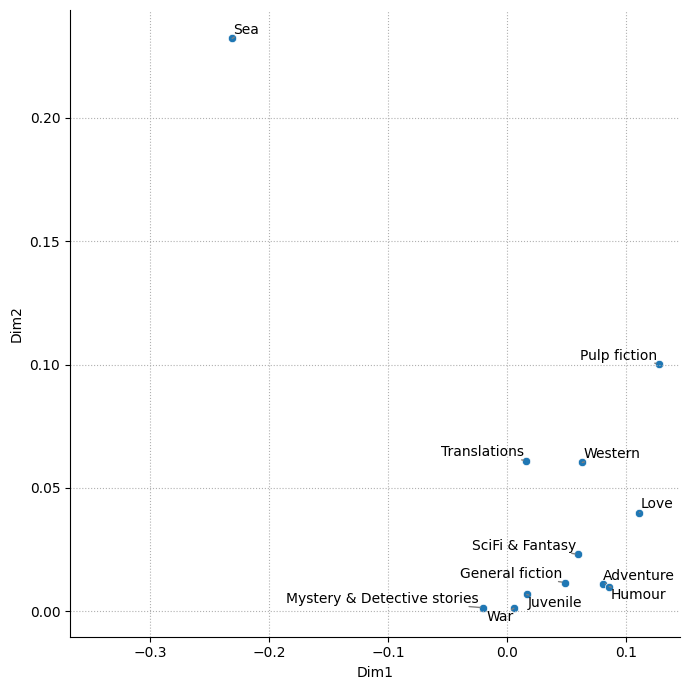

In [8]:
makeplot('Dim1', 'Dim2', data=medians[medians.index != 'Unk'], adjustlabels=True, filename='fig/fig5.10genreMDA', expandlim=True);

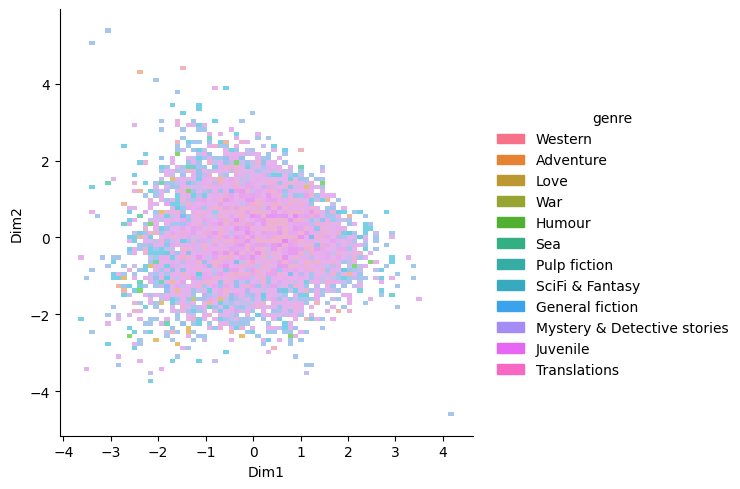

In [9]:
sns.displot(x='Dim1', y='Dim2', data=concatted, hue='genre');

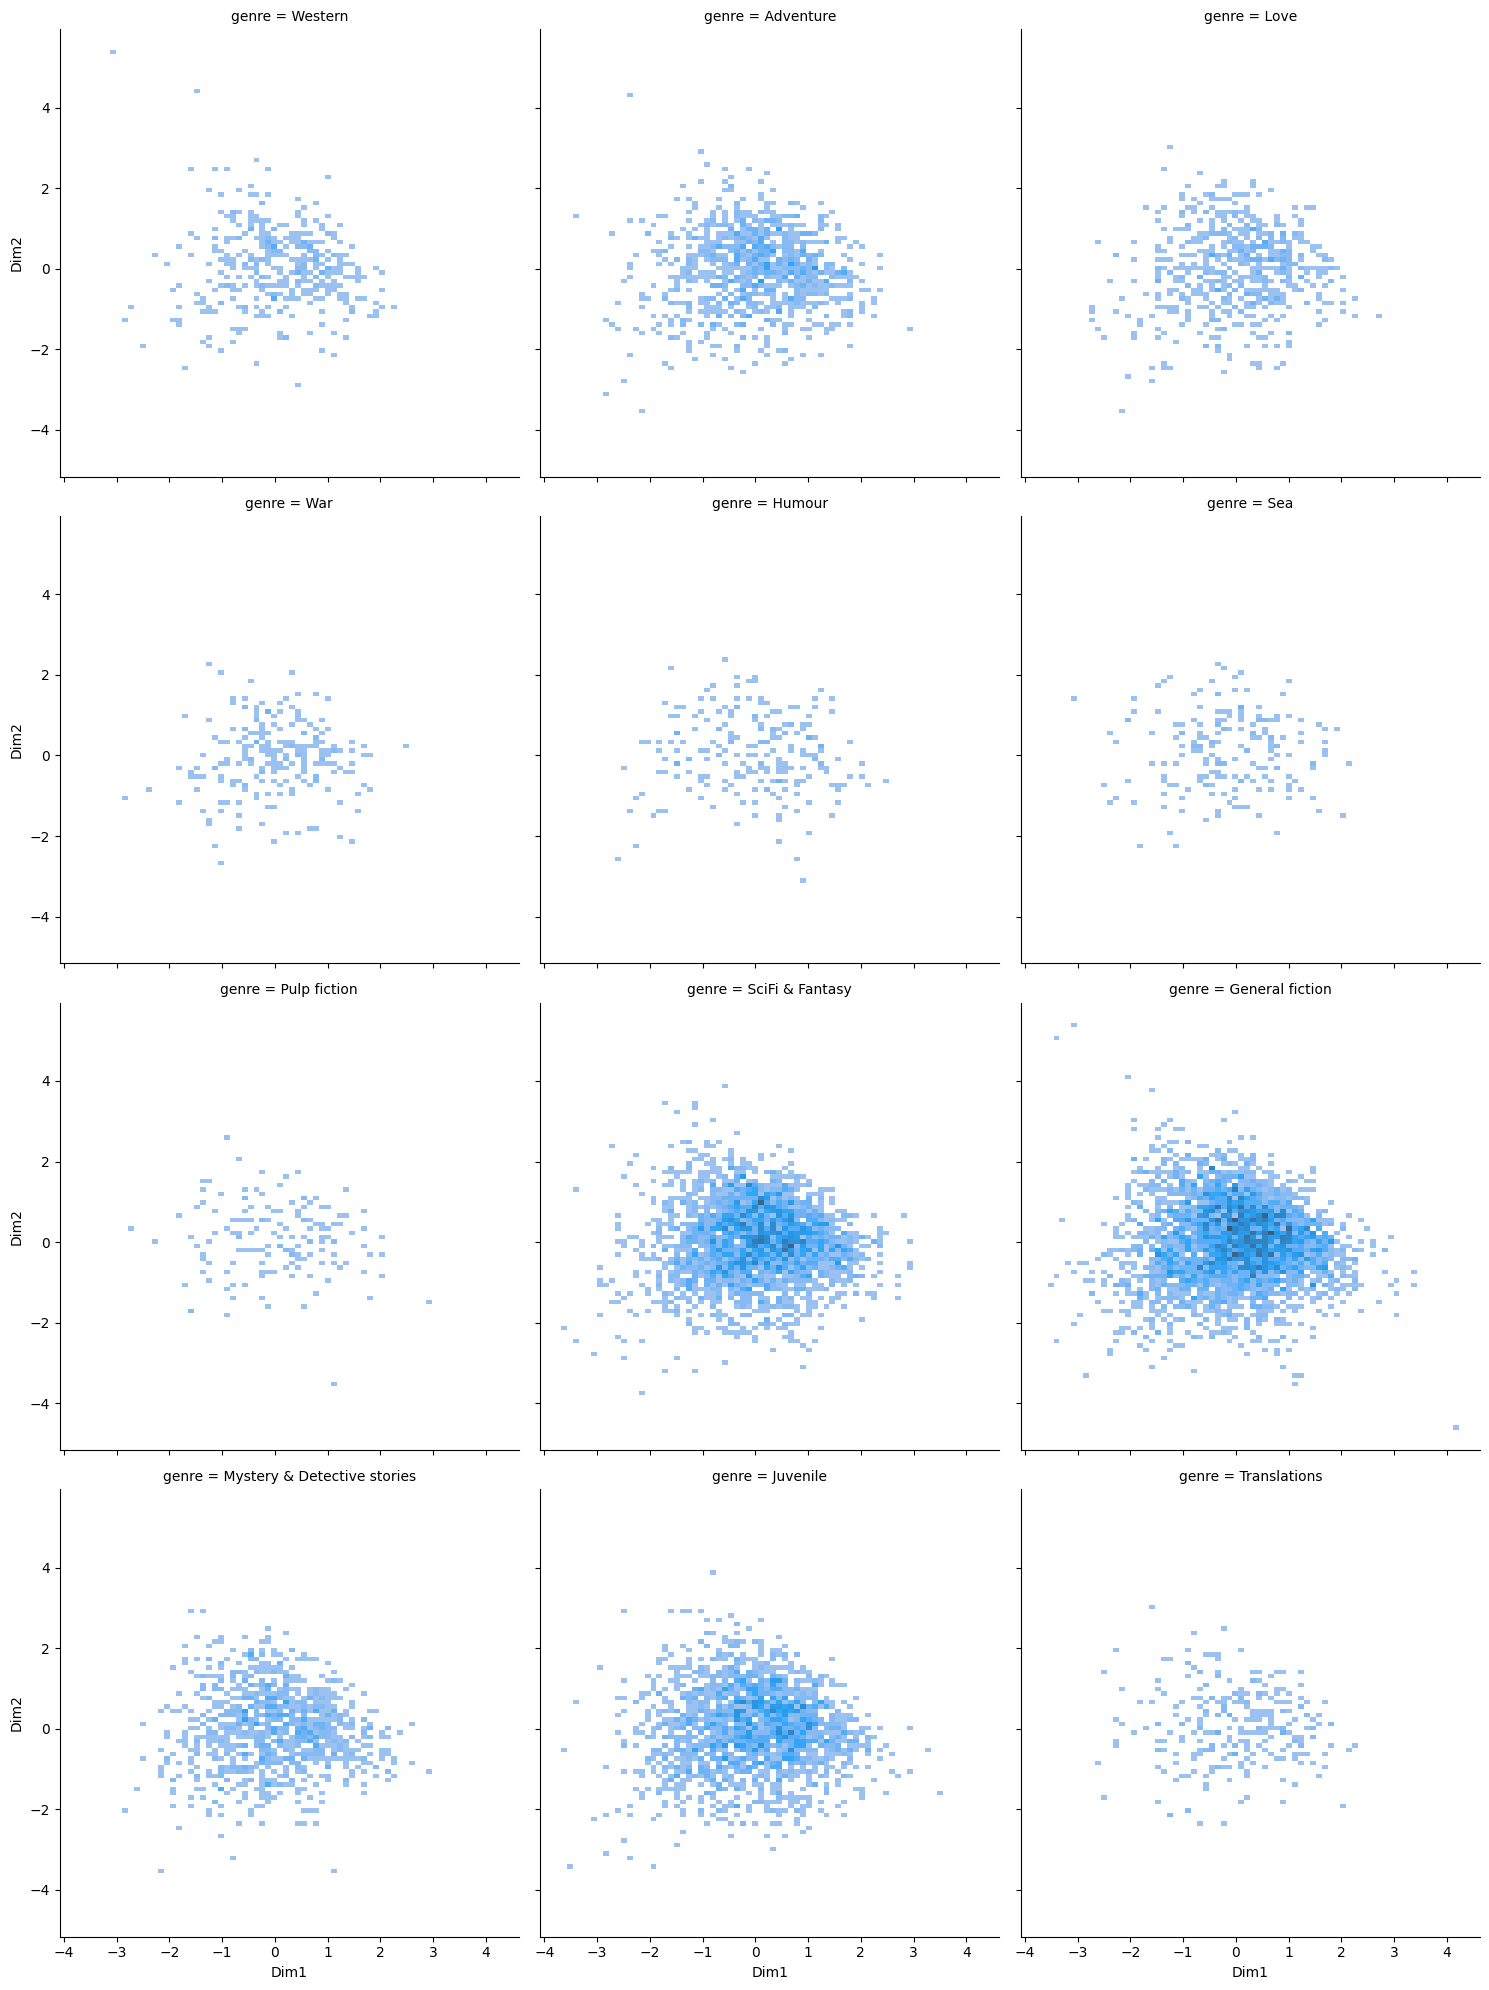

In [10]:
sns.displot(x='Dim1', y='Dim2', data=concatted, col='genre', col_wrap=3);